In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
from collections import Counter
from pprint import pprint
import pickle

In [68]:
from recipetools import search

In [69]:
# set the location of the capstone directory
cap_dir = os.getenv("CAPSTONE_DIR", '/home/ubuntu/gschool-capstone')

# set the location of the settings file
settings_file = os.path.join(cap_dir, 'settings', 'project_settings.json')

# set the pickle paths
pickle_path = os.path.join(cap_dir, 'data', 'pickles')

with open(os.path.join(pickle_path, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

with open(os.path.join(pickle_path, 'topics.pkl'), 'rb') as f:
    topics = pickle.load(f)

In [70]:
query = "Quinoa, cilantro"
categories = []

In [71]:
terms = search.split_query(query)
print(terms)

['quinoa', 'cilantro']


In [72]:
ngrams = search.gen_ngrams(features, terms)
for k, v in ngrams.items():
    pprint({k: [val[0] for val in v]})

{'quinoa': ['quinoa',
            'raw quinoa',
            'red quinoa',
            'blond quinoa',
            'black quinoa',
            'quinoa flour',
            'cooked quinoa',
            'regular quinoa',
            'rainbow quinoa',
            'quinoa spaghetti',
            'cooked red quinoa',
            'cooked black quinoa',
            'regular or red quinoa',
            'quinoa, rinsed thoroughly',
            'cooked red or black quinoa',
            'quinoa-oat crumble topping',
            'quinoa, cooked (4 cups cooked quinoa)',
            'quinoa, brown or red rice, or rice noodles',
            'cooked quinoa (any color)',
            'cooked quinoa, (1 cup uncooked)',
            'cooked quinoa (3/4 cup uncooked)',
            'cooked rice or quinoa for serving']}
{'cilantro': ['cilantro',
              'chopped cilantro',
              'baby cilantro',
              'cilantro sauce',
              'cilantro roots',
              'cilantro stems',
       

In [73]:
recipe_sets = search.gen_recipe_sets(features, categories, ngrams)
for k, v in recipe_sets.items():
    pprint('{}: {}'.format(k, v))

('quinoa: {9985, 5890, 9987, 10504, 1545, 6157, 6415, 6162, 15635, 2069, 6167, '
 '5665, 5666, 6179, 6180, 5669, 6181, 6182, 15649, 9770, 9775, 9520, 7729, '
 '9522, 9778, 9776, 11061, 9777, 16439, 10552, 15933, 5966, 10065, 10836, '
 '10837, 9816, 10843, 10844, 3174, 9831, 9834, 15723, 10609, 10872, 15484, '
 '11132, 13695, 10112, 9858, 5514, 143, 10898, 9879, 9881, 6812, 9637, 10662, '
 '10663, 5032, 5031, 9642, 10156, 10157, 10930, 10935, 5825, 5826, 15557, '
 '5829, 5830, 11721, 15562, 9933, 3278, 3279, 3280, 3281, 5596, 15839, 9953, '
 '6625, 15843, 15587, 15077, 9450, 16109, 11246, 11249, 10228, 15865, 10490, '
 '16638}')
('cilantro: {10240, 4097, 6146, 10245, 2054, 14343, 16392, 10249, 10250, '
 '12296, 10252, 16394, 14350, 16393, 10256, 16401, 2069, 10261, 10263, 10262, '
 '6169, 6170, 10264, 10268, 16413, 10267, 16411, 10272, 10273, 4130, 10275, '
 '12324, 16412, 2087, 12327, 4138, 6187, 10283, 6189, 6190, 14383, 10282, '
 '4140, 12338, 6195, 4148, 10292, 6198, 10293, 14392, 6

In [74]:
match = search.find_initial_matches(recipe_sets)
print(match)
pprint(len(match))

[ 9985  5890  6625 15587  1545  9770 15562  6415  9776  3281  9778 10898
 10930  2069 10837 10228 10552  9881  6812 16638]
20


In [75]:
cluster, distances = search.compute_clusters(topics, match)

Counter({2: 10, 0: 7, 1: 2, 3: 1})


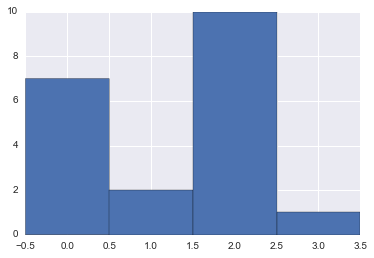

In [76]:
c = Counter(cluster.labels_)
l, r = np.array(list(c.keys()))-.5, np.array(list(c.keys()))+.5
k = set.union(set(l), set(r))
plt.hist(cluster.labels_, bins=list(sorted(k)))
plt.xlim(-.5, None);
print(c)

In [77]:
top_topics = cluster.cluster_centers_.argsort()[:, -5:][:, ::-1]
top_topics

array([[14,  7,  6, 13, 19],
       [ 6,  4,  8, 19,  9],
       [ 7, 17, 12,  0, 14],
       [19, 17,  0, 11,  5]])

In [78]:
def print_words_for_topic(H, topic_number, word_list):
    return ', '.join(np.array(word_list)[np.argsort(H[topic_number])[-10:][::-1]])
    
for ix, cls in enumerate(top_topics):
    print("Cluster {}".format(ix))
    for topic in cls:
        print(print_words_for_topic(topics['H'], topic, features['directions_vocab']))
    print('')

Cluster 0
lemon juice, whisk lemon, whisk lemon juice, juice vinegar, lemon juice vinegar, lemon juice taste, salad toss, juice taste, juice garlic, toss salad
taste adjust, adjust seasoning, taste adjust seasoning, adjust seasonings, taste adjust seasonings, 30 seconds, bouquet garni, fragrant 30, fragrant 30 seconds, onion tender
fry minute, garlic ginger, flat bottomed wok, bottomed wok, 14 inch flat, inch flat bottomed, inch flat, flat bottomed, drop evaporates, fry 10
filled ice, glass filled, glass ice, glass filled ice, rocks glass, ice garnish, highball glass, garnish orange, orange twist, filled ice garnish
wash trim, wash dry, chop onion, mince garlic, saute onion, trim seed, onion begins, wash trim seed, wash dry chop, dry chop

Cluster 1
fry minute, garlic ginger, flat bottomed wok, bottomed wok, 14 inch flat, inch flat bottomed, inch flat, flat bottomed, drop evaporates, fry 10
doesn burn, run underneath, eggs run underneath, eggs run, lifting edges, shake gently, hand lif